<style>
h1 {
  color: #0078d4
}
</style>
<h1>Clustering algorithms</h1>

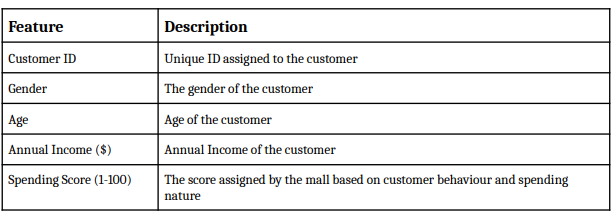

Questions:
1. Load the dataset and perform exploratory data analysis (EDA).
2. Preprocess the data by calculating the number of rows and columns, number of
missing values, outliers, distribution means, medians, quantiles, scaling,
transformation, visualisation, etc.
3. Apply four different clustering algorithms of your choice (e.g., K-means, Hierarchical,
DBSCAN, BIRCH, etc.).
4. Evaluate the performance of each clustering algorithm using relevant metrics (e.g.,
silhouette score, etc.)
5. Discuss the strengths and weaknesses of each clustering algorithm in the context of the
given dataset
6. Discuss your findings and propose potential applications or further steps based on
your results

In [811]:
import pandas as pd
#Importing the dataset
df = pd.read_csv("mall_customers_dataset.csv", sep=';', header=1)

<style>
h3 {
 color: #0078d4
}
</style>
<h3>Exploratory data analysis (EDA)</h3>

In [812]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [813]:
#printing info about columns
#it shows column names, number of rows, data types and number of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [814]:
#describe gives insight about data frame as  min and max, middle, and quartile values per column...
print(df.describe(include='all'))

        CustomerID  Gender         Age  Annual Income ($)  \
count   200.000000     200  200.000000         200.000000   
unique         NaN       2         NaN                NaN   
top            NaN  Female         NaN                NaN   
freq           NaN     112         NaN                NaN   
mean    100.500000     NaN   38.850000       60560.000000   
std      57.879185     NaN   13.969007       26264.721165   
min       1.000000     NaN   18.000000       15000.000000   
25%      50.750000     NaN   28.750000       41500.000000   
50%     100.500000     NaN   36.000000       61500.000000   
75%     150.250000     NaN   49.000000       78000.000000   
max     200.000000     NaN   70.000000      137000.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.000000  
25%

In [815]:
colors = ["#19647E", "#FF6F61", '#B7C3F3', '#DD7596', '#8EB897', '#F9CDAD', '#F8AFA8', '#A8D0E6', '#8A5575', '#D8B56B']

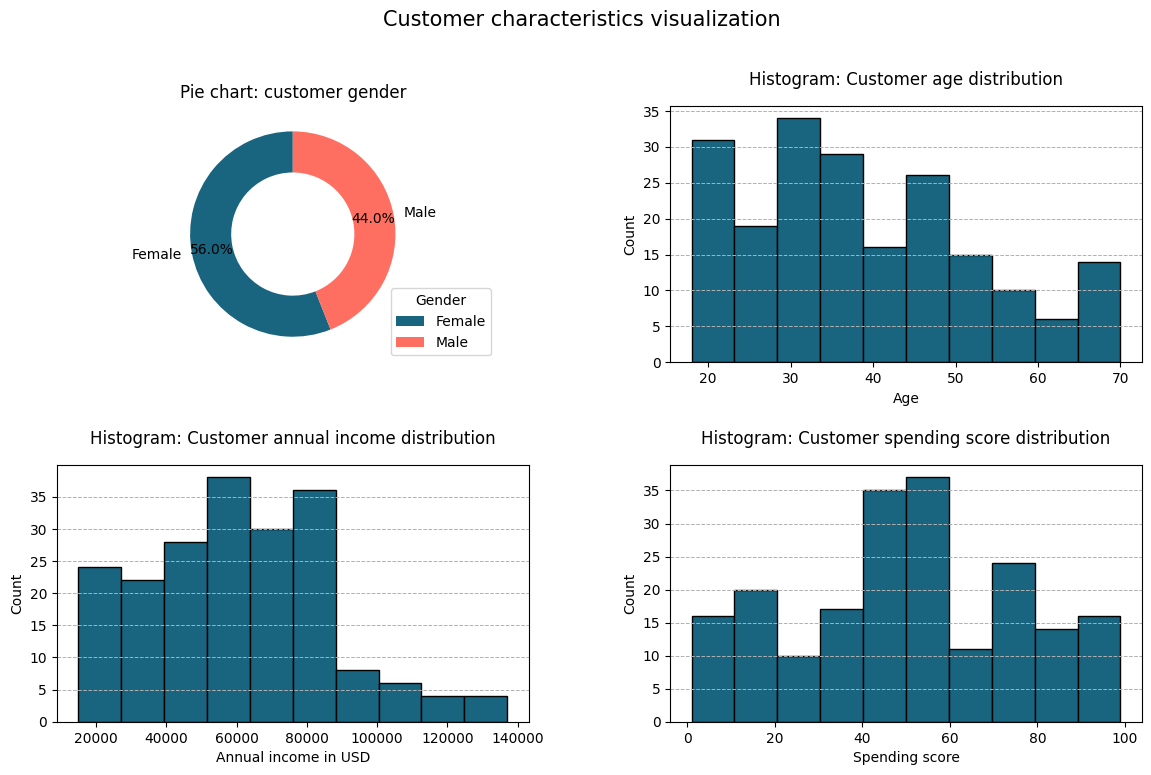

In [816]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

gender_counts = df['Gender'].value_counts()
labels = gender_counts.index

axs[0].pie(df['Gender'].value_counts(), colors=colors, labels= labels ,autopct='%1.1f%%', startangle=90,  wedgeprops=dict(width=0.4), pctdistance=0.8)
axs[0].set_title("Pie chart: customer gender")
axs[0].legend(title="Gender", loc='lower right', bbox_to_anchor=(1.3, 0))

axs[1].hist(df['Age'], bins=10, color=colors[0], edgecolor='black')
axs[1].set_title("Histogram: Customer age distribution", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Count")
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7) 


axs[2].hist(df['Annual Income ($)'], bins=10, color=colors[0], edgecolor='black')
axs[2].set_title("Histogram: Customer annual income distribution", y=1.05)
axs[2].set_xlabel("Annual income in USD")
axs[2].set_ylabel("Count")
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

axs[3].hist(df['Spending Score (1-100)'], bins=10, color=colors[0], edgecolor='black')
axs[3].set_title("Histogram: Customer spending score distribution", y=1.05)
axs[3].set_xlabel("Spending score")
axs[3].set_ylabel("Count")
axs[3].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

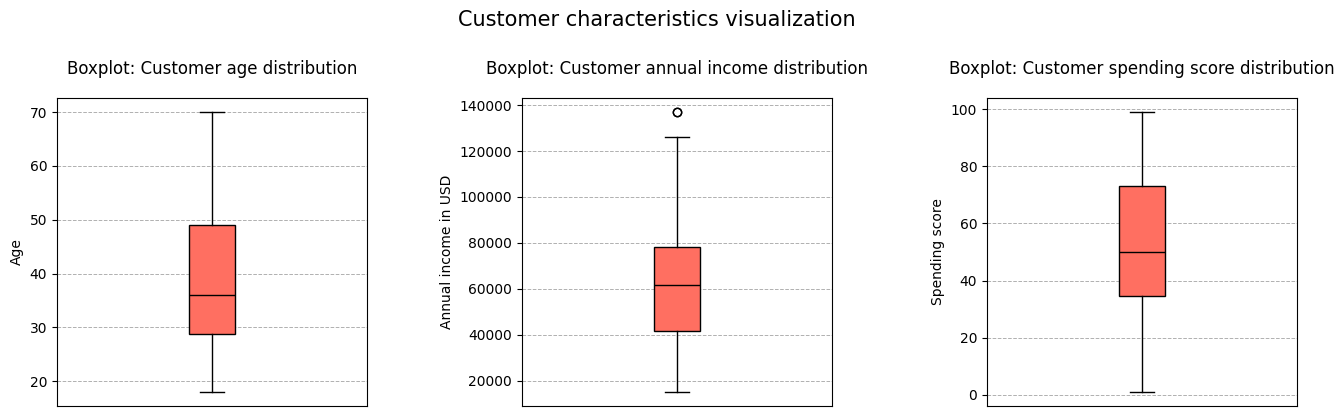

In [817]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()

box_0 = axs[0].boxplot(df['Age'], medianprops=dict(color='black'), patch_artist=True)
axs[0].set_title("Boxplot: Customer age distribution", y=1.05)
axs[0].set_ylabel("Age")
axs[0].set_xticks([])   
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_0['boxes']:
    patch.set_facecolor(colors[1])  

box_1 = axs[1].boxplot(df['Annual Income ($)'], medianprops=dict(color='black'), patch_artist=True)
axs[1].set_title("Boxplot: Customer annual income distribution", y=1.05)
axs[1].set_ylabel("Annual income in USD")
axs[1].set_xticks([])
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_1['boxes']:
    patch.set_facecolor(colors[1])  

box_2 = axs[2].boxplot(df['Spending Score (1-100)'], medianprops=dict(color='black'), patch_artist=True)
axs[2].set_title("Boxplot: Customer spending score distribution", y=1.05)
axs[2].set_ylabel("Spending score")
axs[2].set_xticks([])
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
for patch in box_2['boxes']:
    patch.set_facecolor(colors[1])  

plt.suptitle("Customer characteristics visualization", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.7, wspace=0.5)
plt.show()



In [818]:
df.drop(df[df['Annual Income ($)'] > 136000].index, inplace=True)

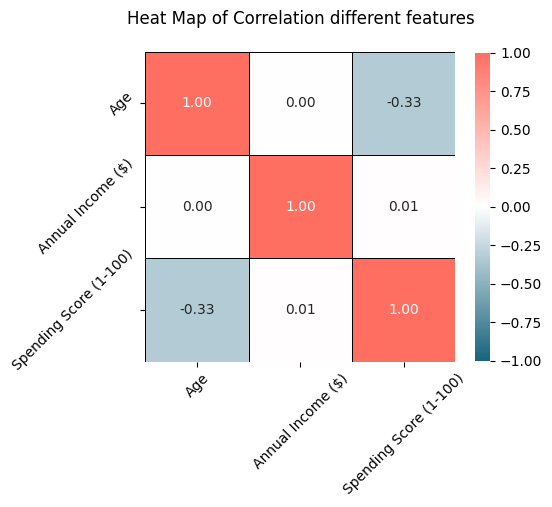

In [819]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

numeric_df = df.select_dtypes(include=[np.number]) #to get only numerical columns
numeric_df.drop(['CustomerID'], axis=1, inplace=True) #drop the ID column
correlation_matrix = numeric_df.corr() #calculate the correlation matrix

my_colors = ['#19647E', '#FFFFFF', '#FF6F61']  # colors for the heatmap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors) # create a custom color map

#plotting the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat Map of Correlation different features', pad=20)
plt.xticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the x-ticks
plt.yticks(ticks=np.arange(len(numeric_df.columns)) + 0.5, labels=numeric_df.columns.str.replace("_", " "), rotation=45) #set the y-ticks

plt.show()

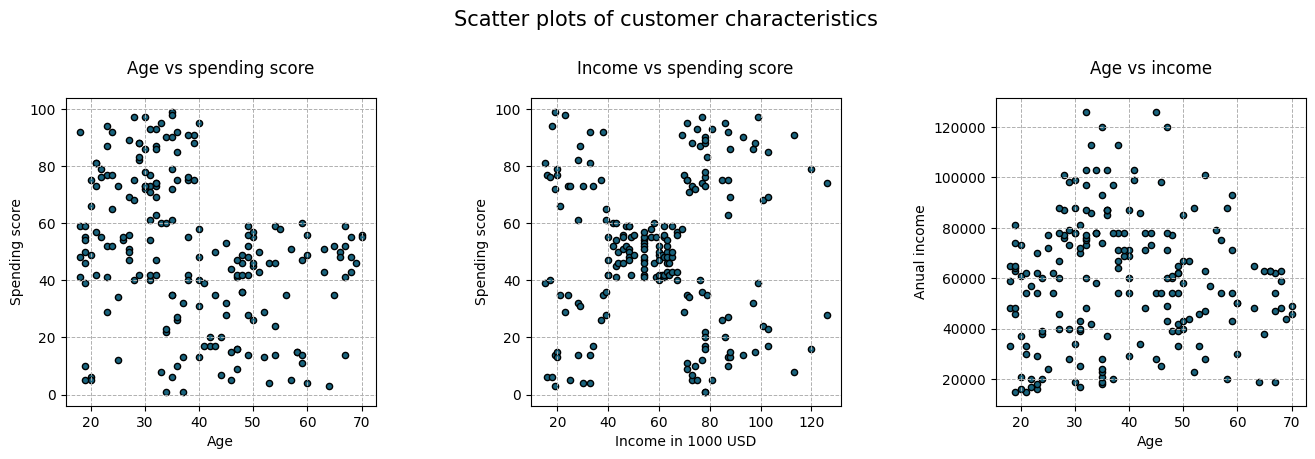

In [820]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs = axs.flatten()

axs[0].scatter(df['Age'], df['Spending Score (1-100)'], color=colors[0], edgecolor='black', s=20)
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

axs[1].scatter(df['Annual Income ($)']/1000, df['Spending Score (1-100)'], color=colors[0], edgecolor='black', s=20)
axs[1].set_title("Income vs spending score", y=1.05)
axs[1].set_xlabel("Income in 1000 USD")
axs[1].set_ylabel("Spending score")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

axs[2].scatter(df['Age'], df['Annual Income ($)'], color=colors[0], edgecolor='black', s=20)
axs[2].set_title("Age vs income", y=1.05)
axs[2].set_xlabel("Age")
axs[2].set_ylabel("Anual income")
axs[2].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)


plt.suptitle("Scatter plots of customer characteristics", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


In [821]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_scaled = df.drop(['CustomerID', 'Age', 'Gender'], axis=1).copy()

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns, index=df.index)

In [822]:
df_scaled.head()

,Annual Income ($),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 1: K-Means Clustering </h3>

After finishing data exploration, I tried different ways of clustering my data. I tried clustering all features, but results were too poorly. I also tried dimensions reduction, using PCA, but results were still bad. <br>
As data exploration showed that there might be some possibilities to cluster features income and spending score, I decided to choose only those 2 features. I experimented with other features as well, but this was the only possible solution that gave satisfactory results.


<h4>Elbow method</h4>

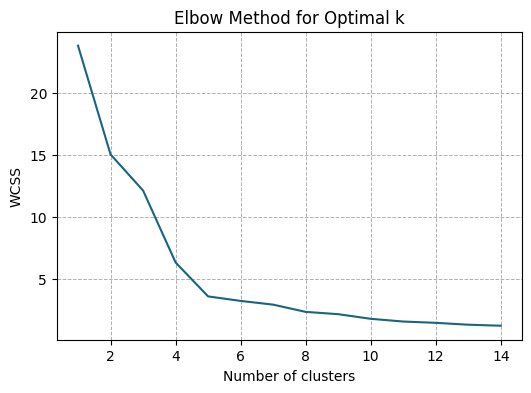

In [823]:
from sklearn.cluster import KMeans

#calculating data for elbow method and showing it on a plot
wcss = [] #wcss is the sum of squared distances of samples to their closest cluster center
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) #inertia_ is the sum of squared distances of samples to their cluster centers

#ploting the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K, wcss, color=colors[0])
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.show()

In [824]:
#creating  k-means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled) #fits the model and predict the clusters
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled) #adding cluster number to data frame
df['Cluster'] = kmeans.fit_predict(df_scaled) #adding cluster number to data frame

In [825]:
df_scaled.head()

,Annual Income ($),Spending Score (1-100),Cluster
0,0.000000,0.387755,3
1,0.000000,0.816327,2
2,0.009009,0.051020,3
3,0.009009,0.775510,2
4,0.018018,0.397959,3


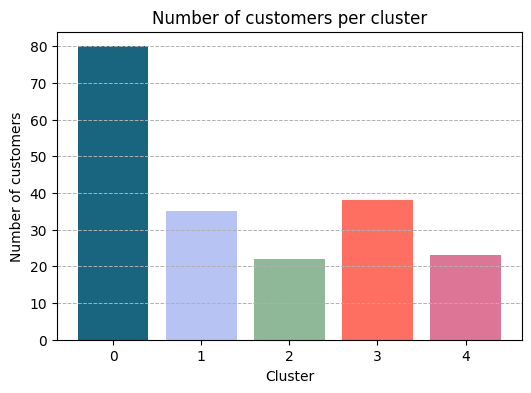

In [826]:
plt.figure(figsize=(6, 4))
#bar plot showing cluster distribution
plt.bar(df['Cluster'].value_counts().index, df['Cluster'].value_counts().values, color=colors)
plt.title('Number of customers per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(np.arange(5), labels=np.arange(5))
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

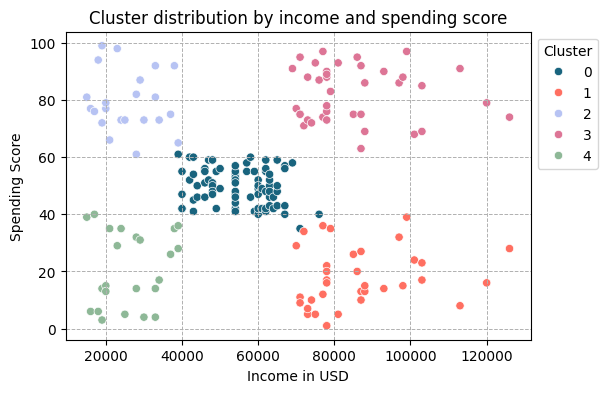

In [827]:
plt.figure(figsize=(6, 4))
colors_kmeaans = colors[:5]
#showing scatterplot that shows data points for each cluster in regards to income and spending data
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_kmeaans)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

#display the plot
plt.show()


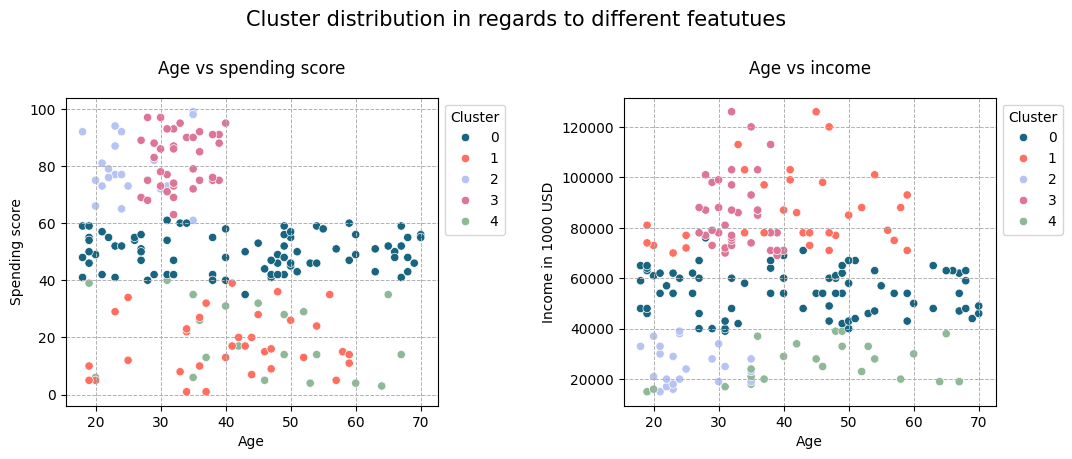

In [828]:
#showing scatterplots that are showing different data points in regards to different features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_kmeaans, ax=axs[0])
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(x='Age', y='Annual Income ($)', data=df, hue='Cluster', palette=colors_kmeaans, ax=axs[1])
axs[1].set_title("Age vs income", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Income in 1000 USD")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Cluster distribution in regards to different featutues", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

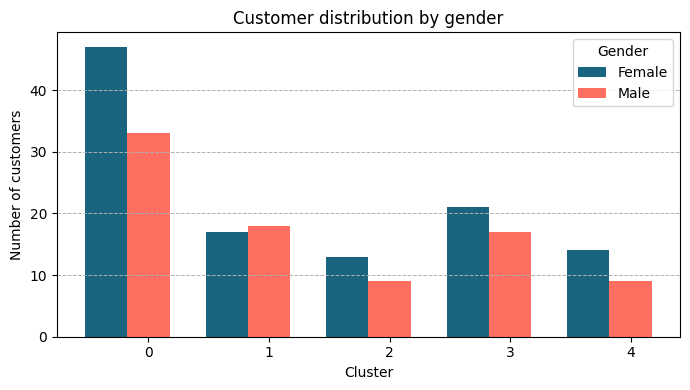

In [829]:
grouped_data = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

clusters = grouped_data.index #cluster names
genders = grouped_data.columns #gender names
x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(7, 4))
#loop through all genders
for i, gender in enumerate(genders):
    #creates bar chart
    #adjusting position for each gender and group data by gender and showing clusters on x-axis
    plt.bar(x + (i - len(genders)/2) * width, grouped_data[gender], width, label=gender, color=colors[i])

plt.title('Customer distribution by gender')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(x, labels=clusters)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


In [830]:
from sklearn.metrics import silhouette_score

silhouette_score_k_means = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f"Sil. score k-means: {silhouette_score_k_means:.2f}")

Sil. score k-means: 0.85


In [831]:
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()
df_scaled.head()

,Annual Income ($),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.009009,0.051020
3,0.009009,0.775510
4,0.018018,0.397959


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 2: DBSCAN </h3>

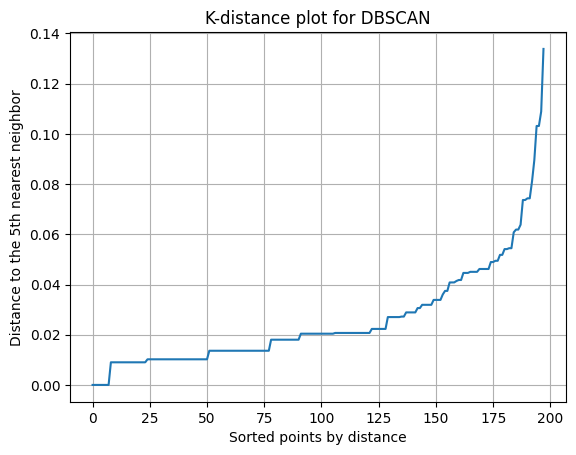

In [832]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3) # n_neighbors is number of neighbors that are considered
knn.fit(df_scaled) # fitting the model
distances, indices = knn.kneighbors(df_scaled) # calculating the distances and indices of the neighbors
distances = np.sort(distances, axis=0) # sorting the distances
distances = distances[:, 1]
plt.grid()
plt.plot(distances)
plt.xlabel('Sorted points by distance')
plt.ylabel('Distance to the 5th nearest neighbor')
plt.title('K-distance plot for DBSCAN')

plt.show()

In [833]:
from sklearn.cluster import DBSCAN

"""
#eps start parameter and list of test samples
eps = 0.07
test_samples = [2, 3, 4]
#loop over the test_samples and eps and calculating the number of clusters and noise points
while eps < 3:
    for t in test_samples:
        dbscan = DBSCAN(eps=eps, min_samples=2)
        dbscan.fit(df_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #calculating number clusters and noise points that are labeled as -1
        n_noise = list(labels).count(-1)
        if  n_noise < 30 and n_clusters < 20: #printing only the results with less than 800 noise points
            df['Cluster'] = labels #adding the cluster column to the dataframe
            df["Cluster"].unique() #geting unique values of the cluster column
            print(f"eps: {eps}, min_samples: {t}, number of clusters: {n_clusters}, number of noise points: {n_noise}")
            print (df["Cluster"].value_counts())
    eps += 0.005
    
"""

'\n#eps start parameter and list of test samples\neps = 0.07\ntest_samples = [2, 3, 4]\n#loop over the test_samples and eps and calculating the number of clusters and noise points\nwhile eps < 3:\n    for t in test_samples:\n        dbscan = DBSCAN(eps=eps, min_samples=2)\n        dbscan.fit(df_scaled)\n        labels = dbscan.labels_\n        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #calculating number clusters and noise points that are labeled as -1\n        n_noise = list(labels).count(-1)\n        if  n_noise < 30 and n_clusters < 20: #printing only the results with less than 800 noise points\n            df[\'Cluster\'] = labels #adding the cluster column to the dataframe\n            df["Cluster"].unique() #geting unique values of the cluster column\n            print(f"eps: {eps}, min_samples: {t}, number of clusters: {n_clusters}, number of noise points: {n_noise}")\n            print (df["Cluster"].value_counts())\n    eps += 0.005\n    \n'

In [834]:
dbscan = DBSCAN(eps=0.09, min_samples=3)
dbscan.fit(df_scaled)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
df['Cluster'] = labels

print(f'Number of clusters: {n_clusters}, Number of noise points: {n_noise}')
df['Cluster'] = labels
df_scaled['Cluster'] = labels
df["Cluster"].unique()
cluster_counts = df["Cluster"].value_counts()
print (cluster_counts)

Number of clusters: 6, Number of noise points: 8
Cluster
 0    96
 4    33
 5    28
 1    18
 2    12
-1     8
 3     3
Name: count, dtype: int64


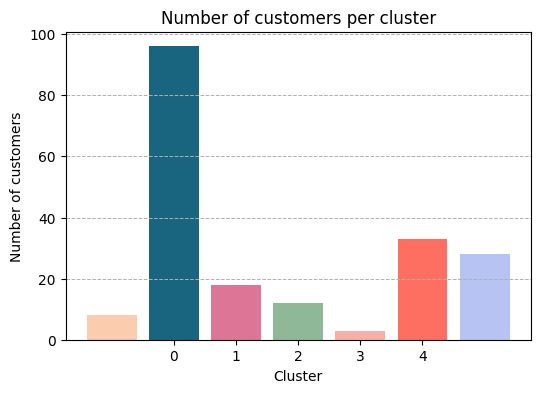

In [835]:
plt.figure(figsize=(6, 4))
#bar plot showing cluster distribution
plt.bar(df['Cluster'].value_counts().index, df['Cluster'].value_counts().values, color=colors)
plt.title('Number of customers per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(np.arange(5), labels=np.arange(5))
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

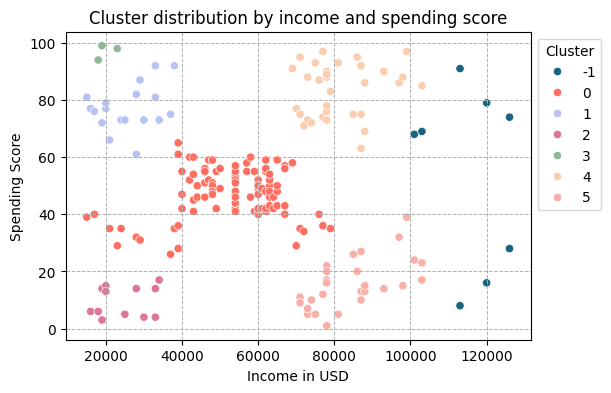

In [836]:
colors_dbscan = colors[:7]
plt.figure(figsize=(6, 4))
#showing scatterplot that shows data points for each cluster in regards to income and spending data
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_dbscan)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

#display the plot
plt.show()

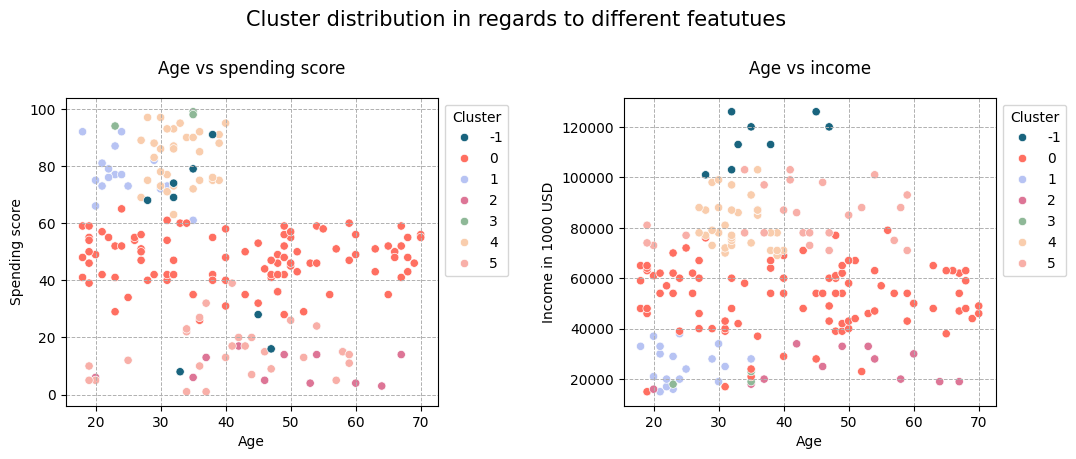

In [837]:
#showing scatterplots that are showing different data points in regards to different features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors_dbscan, ax=axs[0])
axs[0].set_title("Age vs spending score", y=1.05)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending score")
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[0].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(x='Age', y='Annual Income ($)', data=df, hue='Cluster', palette=colors_dbscan, ax=axs[1])
axs[1].set_title("Age vs income", y=1.05)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Income in 1000 USD")
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
axs[1].legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Cluster distribution in regards to different featutues", fontsize=15, y=1.1)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

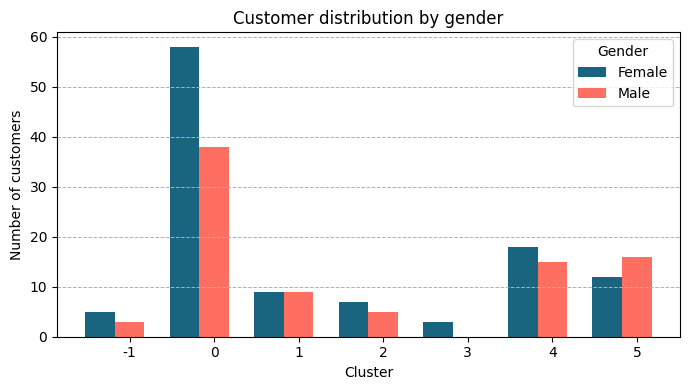

In [838]:
grouped_data = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

clusters = grouped_data.index #cluster names
genders = grouped_data.columns #gender names
x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(7, 4))
#loop through all genders
for i, gender in enumerate(genders):
    #creates bar chart
    #adjusting position for each gender and group data by gender and showing clusters on x-axis
    plt.bar(x + (i - len(genders)/2) * width, grouped_data[gender], width, label=gender, color=colors[i])

plt.title('Customer distribution by gender')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(x, labels=clusters)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [839]:
silhouette_dbscan = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f"Sil. score dbscan: {silhouette_dbscan:.2f}")

Sil. score dbscan: 0.85


<style>
h3 {
 color: #0078d4
}
</style>
<h3>Clustering algorithm 3: Agglomerative Hierarchical Clustering </h3>

In [852]:
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


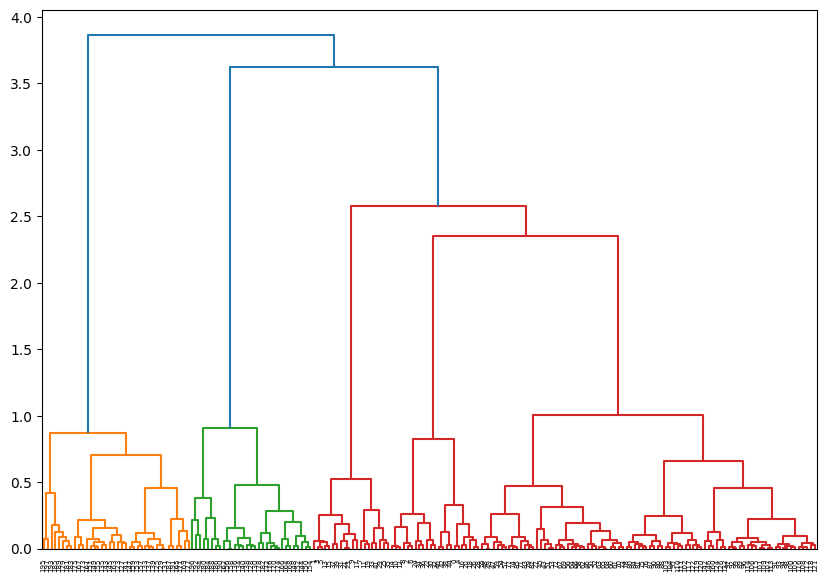

In [841]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, 'ward') 

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()



In [842]:

n = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in n: 
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='ward') #linkage is giving distance information, parameter ward means minimazes total warience between all clusters
    labels = agg_clust.fit_predict(df_scaled)
    df['Cluster'] = labels
    df_scaled['Cluster'] = labels
    silhouette_agg = silhouette_score(df_scaled, df_scaled['Cluster'])
    print(f"Sil. score agg. clust {i} clusters: {silhouette_agg:.2f}")



Sil. score agg. clust 2 clusters: 0.71
Sil. score agg. clust 3 clusters: 0.77
Sil. score agg. clust 4 clusters: 0.81
Sil. score agg. clust 5 clusters: 0.85
Sil. score agg. clust 6 clusters: 0.87
Sil. score agg. clust 7 clusters: 0.87
Sil. score agg. clust 8 clusters: 0.88
Sil. score agg. clust 9 clusters: 0.89
Sil. score agg. clust 10 clusters: 0.89


In [843]:
df = df.drop(['Cluster'], axis=1).copy()
df_scaled = df_scaled.drop(['Cluster'], axis=1).copy()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=10, linkage='ward') #linkage is giving distance information, parameter ward means minimazes total warience between all clusters
labels = agg_clust.fit_predict(df_scaled)
df['Cluster'] = labels
df_scaled['Cluster'] = labels

C:\Users\mird\AppData\Local\Temp\ipykernel_5608\185908758.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors)


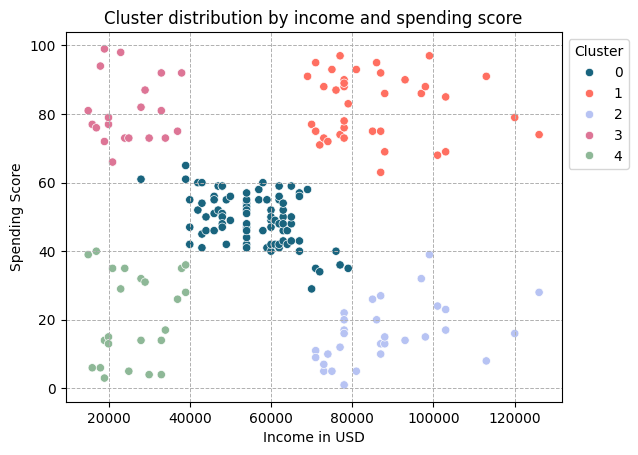

In [851]:
#showing scatterplot that shows data points for each cluster in regards to income and spending data
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=df, hue='Cluster', palette=colors)
plt.title('Cluster distribution by income and spending score')
plt.xlabel('Income in USD')
plt.ylabel('Spending Score')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))